In [63]:
using PolyChaos

## univariate

In [151]:
ϕ = Uniform_11OrthoPoly(4, Nrec=8, addQuadrature=true);

In [228]:
ϕ.quad.weights

7-element Vector{Float64}:
 0.06474248308443471
 0.13985269574463838
 0.19091502525255982
 0.20897959183673492
 0.19091502525255982
 0.13985269574463854
 0.06474248308443491

In [87]:
showpoly(0:ϕ.deg, ϕ)

1
x
x^2 - 0.33
x^3 - 0.6x
x^4 - 0.86x^2 + 0.09


In [130]:
evaluate(0, 0.5, ϕ) |> println # n, x, op
evaluate(0:4, 1.0, ϕ) |> println
evaluate(3, [0, 0.5, 1], ϕ) |> println

1.0
[1.0 1.0 0.6666666666666667 0.4000000000000001 0.22857142857142865]
[-0.0, -0.175, 0.4000000000000001]


In [91]:
u = [convert2affinePCE(-1, 1, u); zeros(u.deg-1)]

5-element Vector{Float64}:
 0.0
 1.0
 0.0
 0.0
 0.0

In [92]:
evaluatePCE(u, ϕ.quad.nodes, ϕ)

7-element Vector{Float64}:
 -0.9491079123427586
 -0.7415311855993946
 -0.40584515137739735
  2.788418582445668e-17
  0.4058451513773973
  0.7415311855993946
  0.9491079123427586

In [93]:
t2 = Tensor(2, ϕ)

Tensor{Uniform_11OrthoPoly{Vector{Float64}, Uniform_11Measure, Quad{Float64, Vector{Float64}}}}(2,   [1 ]  =  1.0
  [6 ]  =  0.333333
  [11]  =  0.0888889
  [16]  =  0.0228571
  [21]  =  0.00580499, PolyChaos.var"#getfun#45"{Int64, Uniform_11OrthoPoly{Vector{Float64}, Uniform_11Measure, Quad{Float64, Vector{Float64}}}, SparseArrays.SparseVector{Float64, Int64}}(2, Uniform_11OrthoPoly{Vector{Float64}, Uniform_11Measure, Quad{Float64, Vector{Float64}}}(4, [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [1.0, 0.3333333333333333, 0.26666666666666666, 0.2571428571428571, 0.25396825396825395, 0.25252525252525254, 0.2517482517482518, 0.2512820512820513], Uniform_11Measure(PolyChaos.w_uniform_11, (-1.0, 1.0), true), Quad{Float64, Vector{Float64}}("golubwelsch", 7, [-0.9491079123427586, -0.7415311855993946, -0.40584515137739735, 2.788418582445668e-17, 0.4058451513773973, 0.7415311855993946, 0.9491079123427586], [0.06474248308443471, 0.13985269574463838, 0.19091502525255982, 0.20897959183673492, 0.190

In [94]:
t2.get([2, 2])

0.08888888888888888

In [95]:
ϕ.quad.weights |> sum

1.000000000000001

## multivariate

In [206]:
Φ = MultiOrthoPoly([ϕ, ϕ], 4); 
# {1, x, x^2 - 0.33}^2

In [207]:
fieldnames(typeof(Φ))

(:name, :deg, :dim, :ind, :measure, :uni)

In [208]:
Φ.ind # graded lexicographic ordering of the multi-index \vec{i}

15×2 Matrix{Int64}:
 0  0
 1  0
 0  1
 2  0
 1  1
 0  2
 3  0
 2  1
 1  2
 0  3
 4  0
 3  1
 2  2
 1  3
 0  4

In [209]:
# (x^2-1/3) * (y^2-1/3)
evaluate([1, 2], [1, 1], Φ) |> println # n, x, p
evaluate([2, 2], [1 1; 1 0.5], Φ) |> println
# 1. x=y=1
# 2. x=1, y=1/2

[0.6666666666666667]
[0.44444444444444453, -0.05555555555555555]


In [210]:
evaluatePCE([[0, 1, 1, 1]; zeros(Φ.dim-4)], [-1 -1], Φ) |> println
evaluatePCE([[0, 1, 1, 1]; zeros(Φ.dim-4)], [1 4; 1 1], Φ) |> println

[-1.3333333333333333]
[5.666666666666667, 2.666666666666667]


In [211]:
tm = Tensor(2, Φ);

In [212]:
tm.T

211-element SparseArrays.SparseVector{Float64, Int64} with 15 stored entries:
  [1  ]  =  1.0
  [16 ]  =  0.333333
  [31 ]  =  0.333333
  [46 ]  =  0.0888889
  [61 ]  =  0.111111
  [76 ]  =  0.0888889
  [91 ]  =  0.0228571
  [106]  =  0.0296296
  [121]  =  0.0296296
  [136]  =  0.0228571
  [151]  =  0.00580499
  [166]  =  0.00761905
  [181]  =  0.00790123
  [196]  =  0.00761905
  [211]  =  0.00580499

In [213]:
tm.get([6, 6])

0.022857142857142854

In [214]:
points = zeros(49, 2)
weights = zeros(49)
for i in eachindex(ϕ.quad.weights), j in eachindex(ϕ.quad.weights)
    idx = 7 * (j - 1) + i
    
    points[idx, 1] = ϕ.quad.nodes[i]
    points[idx, 2] = ϕ.quad.nodes[j]
    weights[idx] = ϕ.quad.weights[i] * ϕ.quad.weights[j]
end

In [215]:
weights |> sum

1.0000000000000022

In [216]:
#pce = [[0, 1, 1, 1]; zeros(Φ.dim-4)]
pce = rand(10)

10-element Vector{Float64}:
 0.2792059473625217
 0.7317232616957285
 0.8777554567014048
 0.4627238215819214
 0.4032792385874764
 0.8301152764350068
 0.5420154856999826
 0.8896916984380372
 0.685718357330922
 0.9109880937866137

In [217]:
phiRan = evaluate(Φ.ind, points, Φ);

In [218]:
phiRan

15×49 Matrix{Float64}:
  1.0        1.0         1.0        …   1.0         1.0        1.0
 -0.949108  -0.741531   -0.405845       0.405845    0.741531   0.949108
 -0.949108  -0.949108   -0.949108       0.949108    0.949108   0.949108
  0.567472   0.216535   -0.168623      -0.168623    0.216535   0.567472
  0.900806   0.703793    0.385191       0.385191    0.703793   0.900806
  0.567472   0.567472    0.567472   …   0.567472    0.567472   0.567472
 -0.285497   0.0371741   0.17666       -0.17666    -0.0371741  0.285497
 -0.538593  -0.205515    0.160041      -0.160041    0.205515   0.538593
 -0.538593  -0.420799   -0.230306       0.230306    0.420799   0.538593
 -0.285497  -0.285497   -0.285497       0.285497    0.285497   0.285497
  0.125046  -0.0832462  -0.0283365  …  -0.0283365  -0.0832462  0.125046
  0.270968  -0.0352822  -0.16767       -0.16767    -0.0352822  0.270968
  0.322025   0.122878   -0.0956889     -0.0956889   0.122878   0.322025
  0.270968   0.211705    0.115868       0.1158

In [219]:
pceRan = evaluatePCE(pce, points, Φ);

In [220]:
chaos = zeros(10)
for j = 1:10
    chaos[j] =
        sum(@. weights * pceRan * phiRan[j, :]) /
        (tm.get([j-1, j-1]) + 1.e-7)
end

In [221]:
chaos

10-element Vector{Float64}:
 0.2792059194419308
 0.7317230421788179
 0.8777551933748492
 0.4627233010182099
 0.4032788756364911
 0.8301143425563746
 0.5420131143926086
 0.8896886957386912
 0.6857160430392789
 0.9109841082311431

In [222]:
mean(chaos, Φ)

0.2792059194419308

In [223]:
std(chaos, Φ)

0.7724734235768013

In [234]:
using Plots

In [239]:
x= rand(20)
y= rand(20)
z= rand(20)
Plots.scatter(x,y,marker_z=z)

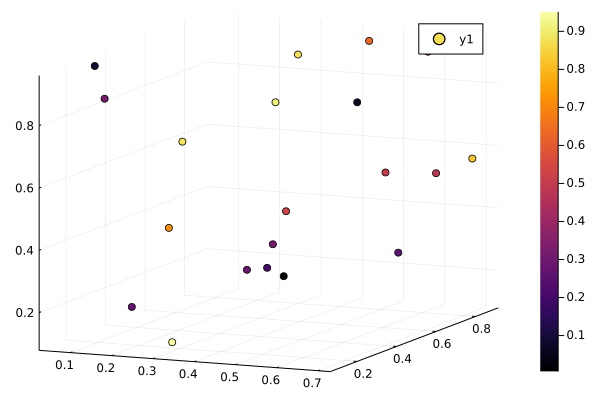

In [244]:
x= rand(20)
y= rand(20)
z= rand(20)
Plots.scatter(x,y,z,marker_z=rand(20))

In [230]:
x = rand(10)
y = rand(10)
colors = randn(10)

10-element Vector{Float64}:
  0.8130475785686597
 -1.3510110301042721
 -2.0397304576377375
 -0.29584808281337416
 -1.3197248520344074
  0.7847885926667615
  1.8441344801145303
  0.8473647204286814
  0.39979300367060744
 -0.6890782966385759

In [232]:
fig = figure("scatter", figsize=(6.5,5))
PyPlot.scatter(x, y, colors)



PyObject <matplotlib.collections.PathCollection object at 0x7f25553ca880>

In [ ]:
fig = figure("scatter", figsize=(6.5,5))
PyPlot.contourf(x_uni, y_uni, u_uni', linewidth=1, levels=20, cmap=ColorMap("inferno"))
colorbar()
PyPlot.streamplot(x_uni, y_uni, u_uni', v_uni', density=1.3, color="moccasin", linewidth=1)
xlabel("x")
ylabel("y")
#PyPlot.title("U-velocity")
xlim(0.01,0.99)
ylim(0.01,0.99)
#PyPlot.grid("on")
display(fig)

In [ ]:
N = 50
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = (30 * np.random.rand(N))**2  # 0 to 15 point radii

plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.show()